### Objective:
- train fastText word embedding on Nigeria’s 2008 standard treatment guidelines

- See the effect of training fastText embedding models.

- Find semantically similar words generated based on the trained models.

- Use the trained models to pick out words that do not match in a series.

- Calculate the similarity between two words.

- Create Visualization after dimensionality reduction using PCA on some semantically similar words

In [1]:
%%capture
!pip install fasttext
import tika 
tika.initVM() 

In [2]:
!pip install gensim

You should consider upgrading via the '/Users/nidhisoley/opt/anaconda3/bin/python -m pip install --upgrade pip' command.


In [3]:
import nltk
from pprint import pprint
from gensim.models import FastText
import fasttext
import re
from nltk.stem import WordNetLemmatizer
nltk.download('punkt')
from nltk import word_tokenize
from pprint import pprint
from tika import parser
import string
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nidhisoley/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
rawText = parser.from_file('Standard Treatment Guideline(Nigeria,2008) without index and appendices.pdf')

In [5]:
rawList = rawText['content'].splitlines()                        
rawList = [item.lower() for item in rawList if item.strip()]    
print(len(rawList))   #About 23229 sentences in total
print(rawList[23222])   #sample sentence

23229
listed for medicines used for the treatment of the stated


In [17]:
rawText

{'metadata': {'Content-Type': 'application/pdf',
  'Last-Modified': '2019-12-06T10:06:35Z',
  'Last-Save-Date': '2019-12-06T10:06:35Z',
  'X-Parsed-By': ['org.apache.tika.parser.DefaultParser',
   'org.apache.tika.parser.pdf.PDFParser'],
  'X-TIKA:content_handler': 'ToTextContentHandler',
  'X-TIKA:embedded_depth': '0',
  'X-TIKA:parse_time_millis': '2603',
  'access_permission:assemble_document': 'true',
  'access_permission:can_modify': 'true',
  'access_permission:can_print': 'true',
  'access_permission:can_print_degraded': 'true',
  'access_permission:extract_content': 'true',
  'access_permission:extract_for_accessibility': 'true',
  'access_permission:fill_in_form': 'true',
  'access_permission:modify_annotations': 'true',
  'date': '2019-12-06T10:06:35Z',
  'dc:format': 'application/pdf; version=1.6',
  'dcterms:modified': '2019-12-06T10:06:35Z',
  'meta:save-date': '2019-12-06T10:06:35Z',
  'modified': '2019-12-06T10:06:35Z',
  'pdf:PDFVersion': '1.6',
  'pdf:charsPerPage': ['

In [6]:
stemmer = WordNetLemmatizer()

def preprocess_text(document):
        # Remove all the special characters
        document = re.sub(r'\W', ' ', str(document))

        # remove all single characters
        document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)

        # Remove single characters from the start
        document = re.sub(r'\^[a-zA-Z]\s+', ' ', document)

        # Substituting multiple spaces with single space
        document = re.sub(r'\s+', ' ', document, flags=re.I)

        # Removing prefixed 'b'
        document = re.sub(r'^b\s+', '', document)

        # Converting to Lowercase
        document = document.lower()

        # Lemmatization
        tokens = document.split()
        tokens = [stemmer.lemmatize(word) for word in tokens]
#         tokens = [word for word in tokens if word not in en_stop]
        tokens = [word for word in tokens if len(word) > 3]

        preprocessed_text = ' '.join(tokens)

        return preprocessed_text

In [7]:
final_corpus = [preprocess_text(sentence) for sentence in rawList if sentence.strip() !='']

In [8]:
final_corpus

['chapter alimentary tract',
 'amoebic dysentery',
 'amoebic abscess',
 'chronic carrier',
 'amoebic dysentery',
 'amoebic liver abscess',
 'gastrointestinal disorder',
 'common parasitic infection gastrointestinal',
 'system caused protozoan',
 'present',
 'fever chill',
 'liver abscess swelling pain right costal area',
 'intracranial space occupying lesion',
 'lung cough blood stained sputum',
 'amoeboma swelling anywhere abdomen',
 'anal ulceration occur direct extension from',
 'intestinal infection',
 'symptom free',
 'bacillary dysentery',
 'other cause bloody diarrhoea',
 'cancer liver',
 'other cause liver enlargement',
 'rupture abscess into lung peritoneum',
 'space occupying lesion brain',
 'right inguinal mass',
 'stool microscopy cyst motile organism',
 'amoebic dysentery',
 'full blood count',
 'chest radiograph amoebic liver abscess',
 'abdominal ultrasound scan',
 'rehydrate adequately',
 'eradicate protozoa',
 'correct dehydration section rehydration',
 'metronidazole'

In [9]:
stg_str = ' '.join(final_corpus)     #Join list of sentences into string
for c in string.punctuation:
    stg_str = stg_str.replace(c, "")  #remove punctuations
len(stg_str)                                      #About 693967 strings in total   

560818

In [10]:
with open("stg.txt", "w") as text_file:
    text_file.write(stg_str)                                       #write string as text file

In [11]:
%%time
stgmodel = fasttext.train_unsupervised('stg.txt',epoch=40,dim=300)    #train model using fasttext
stgmodel.save_model('stg_10.bin')    #save trained model

CPU times: user 1min 13s, sys: 3.89 s, total: 1min 17s
Wall time: 15.5 s


In [12]:
fasttext_trained_model_10 = FastText.load_fasttext_format('stg_10.bin') #Load Model using gensim's Fasttext 

<ipython-input-12-b88326d5472e>:1: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  fasttext_trained_model_10 = FastText.load_fasttext_format('stg_10.bin') #Load Model using gensim's Fasttext


In [13]:
semantically_similar_words = {words: [item[0] for item in fasttext_trained_model_10.wv.most_similar([words], topn=5)]
                  for words in ['paracetamol','gastroenteritis','malaria','sepsis','ulcer','gonorhhoea','diabetes','adult']}

for k,v in semantically_similar_words.items():
    print(k+":"+str(v))

paracetamol:['dosing', 'steroidal', 'analgesic', 'reye', 'salbutamol']
gastroenteritis:['gastritis', 'gastro', 'gastric', 'nephritis', 'gastrointestinal']
malaria:['folic', 'pyrexia', 'eclampsia', 'proteinuria', 'malaise']
sepsis:['necrosis', 'basis', 'pityriasis', 'sclerosis', 'cirrhosis']
ulcer:['ulceration', 'ulcerative', 'peptic', 'amputation', 'cancer']
gonorhhoea:['gonorrhoea', 'gonorrhoeae', 'gonococcal', 'neisseria', 'azithromycin']
diabetes:['mellitus', 'diabetic', 'category', 'hyperglycaemia', 'lifestyle']
adult:['child', 'year', 'over', 'month', 'strongyloides']


In [14]:
all_similar_words = sum([[k] + v for k, v in semantically_similar_words.items()], [])
print(all_similar_words)
print(type(all_similar_words))
print(len(all_similar_words))

['paracetamol', 'dosing', 'steroidal', 'analgesic', 'reye', 'salbutamol', 'gastroenteritis', 'gastritis', 'gastro', 'gastric', 'nephritis', 'gastrointestinal', 'malaria', 'folic', 'pyrexia', 'eclampsia', 'proteinuria', 'malaise', 'sepsis', 'necrosis', 'basis', 'pityriasis', 'sclerosis', 'cirrhosis', 'ulcer', 'ulceration', 'ulcerative', 'peptic', 'amputation', 'cancer', 'gonorhhoea', 'gonorrhoea', 'gonorrhoeae', 'gonococcal', 'neisseria', 'azithromycin', 'diabetes', 'mellitus', 'diabetic', 'category', 'hyperglycaemia', 'lifestyle', 'adult', 'child', 'year', 'over', 'month', 'strongyloides']
<class 'list'>
48


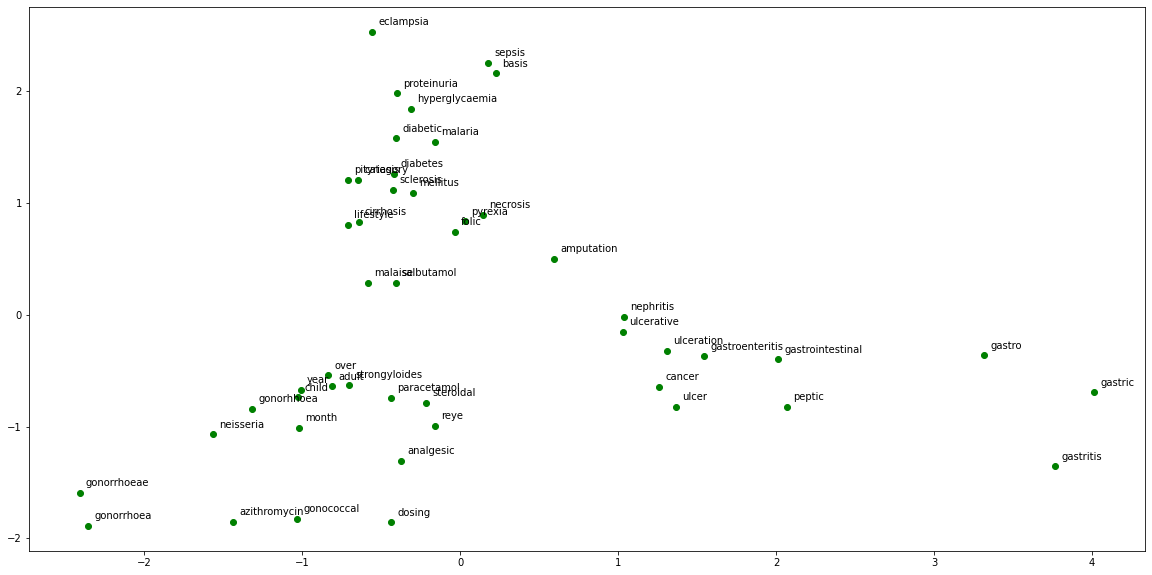

In [16]:
word_vectors = fasttext_trained_model_10.wv[all_similar_words]

pca = PCA(3)

p_comps = pca.fit_transform(word_vectors)
word_names = all_similar_words

plt.figure(figsize=(20, 10))
plt.scatter(p_comps[:, 0], p_comps[:, 1], c='g')

for word_names, x, y in zip(word_names, p_comps[:, 0], p_comps[:, 1]):
    plt.annotate(word_names, xy=(x+0.04, y+0.06), xytext=(0, 0), textcoords='offset points')